In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.losses import MeanSquaredError

In [4]:
def json_to_csv(json_file, csv_file):
    df = pd.read_json(json_file, lines=True)
    df.to_csv(csv_file, index=False)
    print(f"Converted {json_file} to {csv_file}")

json_file = '../sensor_data.json'
csv_file = '../train_data.csv'

json_to_csv(json_file, csv_file)

Converted ../sensor_data.json to ../train_data.csv


In [23]:
# Load the dataset
csvdata = pd.read_csv('../train_data.csv')
csvdata.head()

,sensor,phase,event,seq,active,reactive,current,voltage,frequency,hr0,...,tr6,tr7,tr8,tr9,draw,power,thd,shift,capture,lag
0,997.0,0,5.0,88534.0,1.5,-0.8,0.008,236.9,50.00,19.8,...,-84.1,-100.0,86.4,100.0,12391618.2,288.5,57.9,58.5,968.0,16i 1731991061006130855
1,997.0,1,5.0,88535.0,0.8,1.5,0.007,237.7,50.02,100.0,...,-88.4,-100.0,96.8,98.1,1068603.1,401.5,32.2,21.1,968.0,16i 1731991061006130855
2,997.0,2,5.0,88536.0,0.8,0.8,0.006,240.7,50.01,66.9,...,-78.4,-100.0,100.0,98.7,4535402.7,316.9,30.5,-26.3,968.0,16i 1731991061006130855
3,997.0,0,5.0,88537.0,0.0,-3.1,0.012,236.8,49.99,100.0,...,84.3,96.0,100.0,-94.4,12391632.6,288.5,58.7,58.3,966.0,16i 1731991241001169318
4,997.0,1,5.0,88538.0,1.5,-3.1,0.015,237.6,50.00,62.4,...,-91.3,-93.4,-100.0,100.0,1068623.2,403.1,30.1,21.4,966.0,16i 1731991241001169318


In [ ]:
data = csvdata.drop(columns=['sensor', 'event', 'lag'])

# Step 2: Process data for each phase
phases = data['phase'].unique()
phases

models = {}
scalers = {}

In [32]:
phases

array([0, 1, 2], dtype=int64)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   phase      796 non-null    int64  
 1   seq        796 non-null    float64
 2   active     796 non-null    float64
 3   reactive   796 non-null    float64
 4   current    796 non-null    float64
 5   voltage    796 non-null    float64
 6   frequency  796 non-null    float64
 7   hr0        796 non-null    float64
 8   hr1        796 non-null    float64
 9   hr2        796 non-null    float64
 10  hr3        796 non-null    float64
 11  hr4        796 non-null    float64
 12  hr5        796 non-null    float64
 13  hr6        796 non-null    float64
 14  hr7        796 non-null    float64
 15  hr8        796 non-null    float64
 16  tr0        796 non-null    float64
 17  tr1        796 non-null    float64
 18  tr2        796 non-null    float64
 19  tr3        796 non-null    float64
 20  tr4       

Processing phase 0...
Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1478 - val_loss: 0.1540
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1445 - val_loss: 0.1465
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1381 - val_loss: 0.1348
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1281 - val_loss: 0.1196
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1139 - val_loss: 0.1052
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1014 - val_loss: 0.0956
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0884 - val_loss: 0.0903
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0779 - val_loss: 0.0894
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0711 - val_loss: 0.0905
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0672 - val_loss: 0.0893
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0662 - val_loss: 0.0867
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0646 - val_los

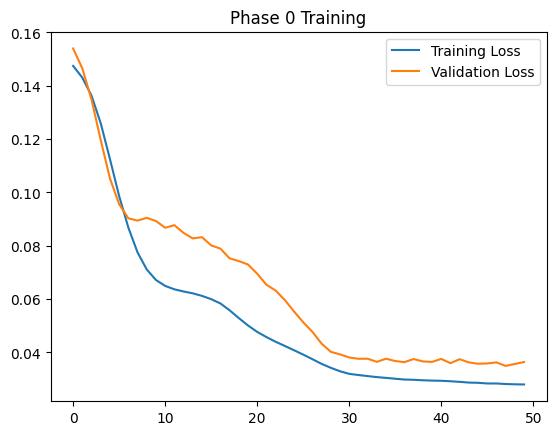

Model for phase 0 trained and saved.
Processing phase 1...
Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.1468 - val_loss: 0.1507
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1454 - val_loss: 0.1491
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1438 - val_loss: 0.1462
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1390 - val_loss: 0.1408
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1329 - val_loss: 0.1318
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1195 - val_loss: 0.1185
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1023 - val_loss: 0.1046
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0868 - val_loss: 0.0962
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0757 - val_loss: 0.0910
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0669 - val_loss: 0.0869
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0643 - val_loss: 0.0845
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━

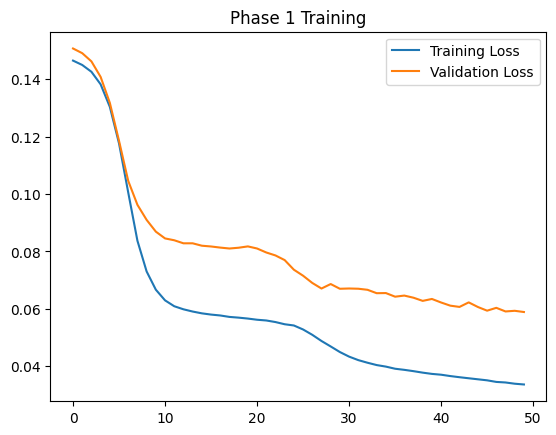

Model for phase 1 trained and saved.
Processing phase 2...
Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.1634 - val_loss: 0.1638
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1597 - val_loss: 0.1607
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1574 - val_loss: 0.1558
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1524 - val_loss: 0.1477
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1439 - val_loss: 0.1343
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1288 - val_loss: 0.1140
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1072 - val_loss: 0.0923
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0874 - val_loss: 0.0786
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0770 - val_loss: 0.0748
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0703 - val_loss: 0.0769
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0628 - val_loss: 0.0818
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━

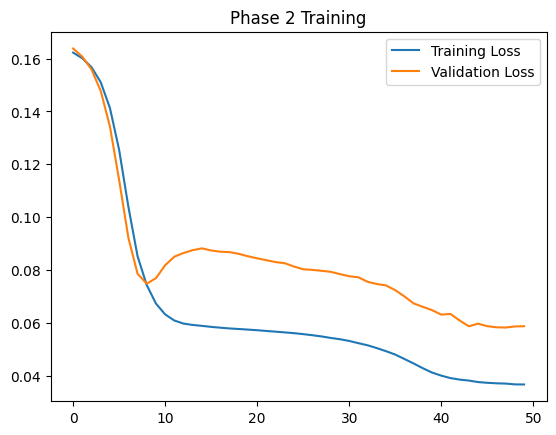

Model for phase 2 trained and saved.


In [ ]:
for phase in phases:
    print(f"Processing phase {phase}...")
    phase_data = data[data['phase'] == phase].drop(columns=['phase'])
    
    # Normalize data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(phase_data)
    scalers[phase] = scaler  # Save scaler for real-time use

    # Train-Test Split
    train_data = scaled_data  # Assuming no test set for simplicity

    # Autoencoder Model
    input_dim = train_data.shape[1]
    input_layer = Input(shape=(input_dim,))
    encoder = Dense(32, activation="relu")(input_layer)
    encoder = Dense(16, activation="relu")(encoder)
    encoder = Dense(8, activation="relu")(encoder)
    bottleneck = Dense(4, activation="relu")(encoder)  # Bottleneck
    decoder = Dense(8, activation="relu")(bottleneck)
    decoder = Dense(16, activation="relu")(decoder)
    decoder = Dense(32, activation="relu")(decoder)
    decoder = Dense(input_dim, activation="sigmoid")(decoder)

    autoencoder = Model(inputs=input_layer, outputs=decoder)
    autoencoder.compile(optimizer="adam", loss=MeanSquaredError())

    # Training
    history = autoencoder.fit(train_data, train_data,
                    epochs=50,
                    batch_size=32,
                    shuffle=True,
                    validation_split=0.1,
                    verbose=1)
    
    # Save model
    models[phase] = autoencoder
    autoencoder.save(f"./models/autoencoder_phase_{phase}.h5")
    joblib.dump(scaler, f"./scalers/scaler_phase_{phase}.pkl")

    # Plot training and validation loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Phase {phase} Training')
    plt.legend()
    plt.show()

    print(f"Model for phase {phase} trained and saved.")

In [31]:
def detect_anomalies(real_time_data, phase):
    # Filter for the given phase
    filtered_data = real_time_data[real_time_data['phase'] == phase].drop(columns=['phase', 'sensor', 'event', 'lag'])
    
    # Normalize using the saved scaler
    scaler = scalers[phase]
    scaled_data = scaler.transform(filtered_data)
    
    # Load the saved model
    model = load_model(f"autoencoder_phase_{phase}.h5")
    
    # Predict reconstruction errors
    reconstructions = model.predict(scaled_data)
    reconstruction_error = np.mean(np.square(scaled_data - reconstructions), axis=1)
    
    # Define anomaly threshold (can be refined)
    threshold = np.mean(reconstruction_error) + 3 * np.std(reconstruction_error)
    
    # Detect anomalies
    anomalies = reconstruction_error > threshold
    anomaly_indices = real_time_data[real_time_data['phase'] == phase].index[anomalies]
    
    return anomaly_indices

# Example real-time inference
live_data = pd.DataFrame([
    [997.0, 0, 5.0, 95123.0, 0.8, -0.0, 0.003, 236.8, 50.01, 32.7, 46.1, 272.3, 164.5, 239.3, 164.7, 139.9, 211.9, 184.9, -100.0, -38.2, 10.6, 44.7, 56.1, 74.0, 88.6, 100.0, 96.7, 77.2, 12420690.1, 248.5, 133.9, 11.4, 971.0, "18i 1732363010008609692"],
    [997.0, 1, 5.0, 95124.0, 0.0, 0.0, 0.0, 237.5, 50.02, 45.6, 1851.2, 688.9, 1068.2, 866.6, 1471.2, 4116.6, 1239.2, 2239.8, -100.0, -50.0, -35.7, -64.3, -85.7, -78.6, -64.3, -42.9, -57.1, -64.3, 1103924.7, 20.8, 32.3, 30.7, 971.0, "18i 1732363010008609692"]
], columns=csvdata.columns)

# Detect anomalies for phase 0
live_data.iloc[0, 4] = 1000
anomalies = detect_anomalies(live_data, phase=1)
print("Anomaly Indices for Phase 0:", anomalies)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Anomaly Indices for Phase 0: Index([], dtype='int64')


In [25]:
csvdata.columns

Index(['sensor', 'phase', 'event', 'seq', 'active', 'reactive', 'current',
       'voltage', 'frequency', 'hr0', 'hr1', 'hr2', 'hr3', 'hr4', 'hr5', 'hr6',
       'hr7', 'hr8', 'tr0', 'tr1', 'tr2', 'tr3', 'tr4', 'tr5', 'tr6', 'tr7',
       'tr8', 'tr9', 'draw', 'power', 'thd', 'shift', 'capture', 'lag'],
      dtype='object')

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Select the columns to normalize
columns_to_normalize = ['ACTIVE', 'REACTIVE', 'PHASE ANGLE'] + [f'H{i}' for i in range(1, 18, 2)] + [f'T{i}' for i in range(1, 10)]

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the columns and update the DataFrame
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Verify normalization
data.describe()

,ON/OFF,PHASE,ACTIVE,REACTIVE,PHASE ANGLE,H1,H3,H5,H7,H9,...,H17,T1,T2,T3,T4,T5,T6,T7,T8,T9
count,7519.000000,7519.000000,7519.000000,7519.000000,7519.000000,7519.000000,7519.000000,7519.000000,7519.000000,7519.000000,...,7519.000000,7519.000000,7519.000000,7519.000000,7519.000000,7519.000000,7519.000000,7519.000000,7519.000000,7519.000000
mean,1.504189,1.979785,0.065088,0.426834,0.079113,0.582580,0.046900,0.114062,0.217850,0.141532,...,0.207504,0.500720,0.508499,0.509397,0.507631,0.505846,0.470942,0.493226,0.498366,0.506488
std,0.500016,0.817223,0.062316,0.128645,0.077980,0.300265,0.060388,0.085171,0.195453,0.165228,...,0.213410,0.497718,0.455040,0.397516,0.325477,0.240184,0.155099,0.061837,0.093424,0.183495
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.019467,0.379761,0.009592,0.309875,0.003647,0.043025,0.063134,0.013568,...,0.033071,0.000000,0.042000,0.103000,0.181000,0.272500,0.327068,0.463918,0.419174,0.329500
50%,2.000000,2.000000,0.036400,0.412545,0.025739,0.725312,0.011782,0.080657,0.147695,0.082412,...,0.116324,0.500000,0.795000,0.620500,0.591500,0.615000,0.555854,0.491753,0.491586,0.500000
75%,2.000000,3.000000,0.092800,0.462100,0.151719,0.838820,0.096596,0.188579,0.357184,0.191960,...,0.434340,1.000000,0.962500,0.904000,0.826000,0.735000,0.610902,0.522165,0.571647,0.672500
max,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Convert ON/OFF to binary
data['ON/OFF'] = data['ON/OFF'].apply(lambda x: 1 if x == 1 else 0)

# Select features and include 'ON/OFF'
columns_with_on_off = ['ON/OFF'] + columns_to_normalize

In [18]:
data_preprocess = data[columns_with_on_off]

In [19]:
data_preprocess.head()

,ON/OFF,ACTIVE,REACTIVE,PHASE ANGLE,H1,H3,H5,H7,H9,H11,...,H17,T1,T2,T3,T4,T5,T6,T7,T8,T9
0,1,0.036400,0.410366,0.013269,0.920545,0.150458,0.213806,0.367324,0.594472,0.379124,...,0.520092,0.0,0.042,0.1035,0.1820,0.2745,0.330290,0.464948,0.574707,0.6805
1,1,0.020000,0.462100,0.016467,0.785471,0.017486,0.277685,0.592309,0.182412,0.640251,...,0.457797,0.0,0.043,0.1045,0.1825,0.2740,0.328679,0.463402,0.574197,0.6810
2,1,0.013333,0.371044,0.008793,0.304200,0.003553,0.047220,0.072891,0.009045,0.056031,...,0.037493,0.0,0.044,0.1080,0.1880,0.2795,0.332438,0.464948,0.577257,0.6840
3,0,0.031800,0.410366,0.008473,0.892168,0.148307,0.209372,0.379759,0.590955,0.364985,...,0.572198,1.0,0.962,0.9005,0.8195,0.7240,0.594522,0.502577,0.401836,0.3125
4,0,0.019000,0.458499,0.013589,0.754824,0.012998,0.270494,0.597283,0.169849,0.648455,...,0.494520,1.0,0.968,0.9115,0.8340,0.7415,0.613856,0.520103,0.416624,0.3235


Training for Phase 1
Epoch 1/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1088 - val_loss: 0.1031
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0711 - val_loss: 0.0634
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0409 - val_loss: 0.0412
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0254 - val_loss: 0.0303
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0174 - val_loss: 0.0248
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0135 - val_loss: 0.0219
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0111 - val_loss: 0.0202
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0098 - val_loss: 0.0191
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0093 - val_loss: 0.0181
Epoch 10/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0084 - val_loss: 0.0176
Epoch 11/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0077 - val_loss: 0.0163
Epoch 12/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

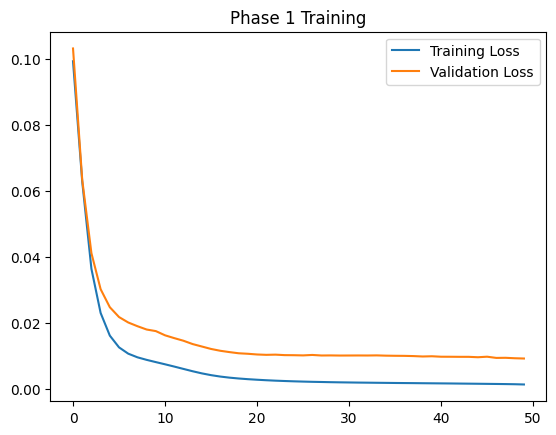

Training for Phase 2
Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1175 - val_loss: 0.1023
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0901 - val_loss: 0.0770
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0651 - val_loss: 0.0545
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0432 - val_loss: 0.0362
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0261 - val_loss: 0.0255
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0151 - val_loss: 0.0195
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0090 - val_loss: 0.0163
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0056 - val_loss: 0.0146
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039 - val_loss: 0.0138
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0030 - val_loss: 0.0133
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027 - val_loss: 0.0130
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - 

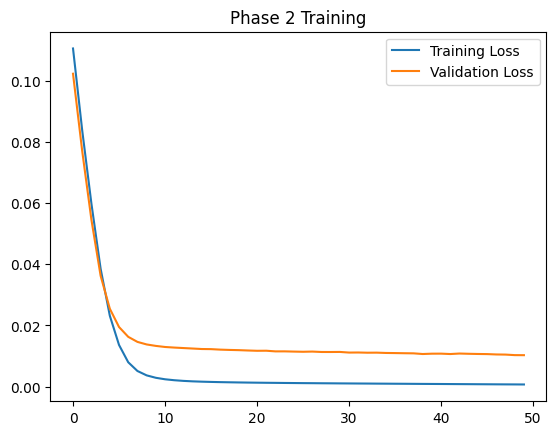

Training for Phase 3
Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1302 - val_loss: 0.0876
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0789 - val_loss: 0.0537
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0402 - val_loss: 0.0342
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0200 - val_loss: 0.0247
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0103 - val_loss: 0.0204
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0064 - val_loss: 0.0185
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0045 - val_loss: 0.0176
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0035 - val_loss: 0.0172
Epoch 9/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031 - val_loss: 0.0170
Epoch 10/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028 - val_loss: 0.0168
Epoch 11/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0026 - val_loss: 0.0167
Epoch 12/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

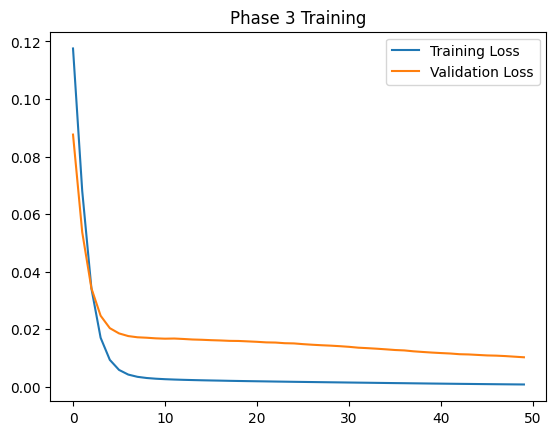

In [20]:
# Function to build and train an autoencoder model for a given phase
def train_autoencoder(phase_data, phase_number):
    input_dim = phase_data.shape[1]
    encoding_dim = int(input_dim / 2)
    
    # Define the autoencoder model
    input_layer = Input(shape=(input_dim,))
    encoder = Dense(encoding_dim, activation="relu")(input_layer)
    decoder = Dense(input_dim, activation="sigmoid")(encoder)
    autoencoder = Model(inputs=input_layer, outputs=decoder)

    # Compile the model
    autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss="mse")

    # Train the model
    history = autoencoder.fit(
        phase_data, phase_data,
        epochs=50,
        batch_size=32,
        shuffle=True,
        validation_split=0.2
    )

    # Plot training and validation loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Phase {phase_number} Training')
    plt.legend()
    plt.show()

    return autoencoder

# Prepare data and train the autoencoder for each phase
print("Training for Phase 1")
phase_1_data = data[data['PHASE'] == 1][columns_with_on_off].values
autoencoder_phase_1 = train_autoencoder(phase_1_data, 1)

print("Training for Phase 2")
phase_2_data = data[data['PHASE'] == 2][columns_with_on_off].values
autoencoder_phase_2 = train_autoencoder(phase_2_data, 2)

print("Training for Phase 3")
phase_3_data = data[data['PHASE'] == 3][columns_with_on_off].values
autoencoder_phase_3 = train_autoencoder(phase_3_data, 3)

In [21]:
# Function to evaluate anomalies
def detect_anomalies(autoencoder, phase_data):
    # Get reconstruction error
    reconstructions = autoencoder.predict(phase_data)
    reconstruction_errors = np.mean(np.square(phase_data - reconstructions), axis=1)
    
    # Set the threshold for anomalies (mean + 3 * std as an example)
    threshold = np.mean(reconstruction_errors) + 3 * np.std(reconstruction_errors)
    anomalies = reconstruction_errors > threshold
    
    return reconstruction_errors, threshold, anomalies

# Detect anomalies for each phase
print("Detecting anomalies for Phase 1")
reconstruction_errors_1, threshold_1, anomalies_1 = detect_anomalies(autoencoder_phase_1, phase_1_data)
print(f"Threshold for Phase 1: {threshold_1}")
print(f"Number of anomalies in Phase 1: {np.sum(anomalies_1)}")

print("Detecting anomalies for Phase 2")
reconstruction_errors_2, threshold_2, anomalies_2 = detect_anomalies(autoencoder_phase_2, phase_2_data)
print(f"Threshold for Phase 2: {threshold_2}")
print(f"Number of anomalies in Phase 2: {np.sum(anomalies_2)}")

print("Detecting anomalies for Phase 3")
reconstruction_errors_3, threshold_3, anomalies_3 = detect_anomalies(autoencoder_phase_3, phase_3_data)
print(f"Threshold for Phase 3: {threshold_3}")
print(f"Number of anomalies in Phase 3: {np.sum(anomalies_3)}")

Detecting anomalies for Phase 1
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Threshold for Phase 1: 0.02158919439445217
Number of anomalies in Phase 1: 32
Detecting anomalies for Phase 2
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Threshold for Phase 2: 0.02444681282775101
Number of anomalies in Phase 2: 122
Detecting anomalies for Phase 3
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Threshold for Phase 3: 0.02327182690690623
Number of anomalies in Phase 3: 75


Phase 1 Reconstruction Errors


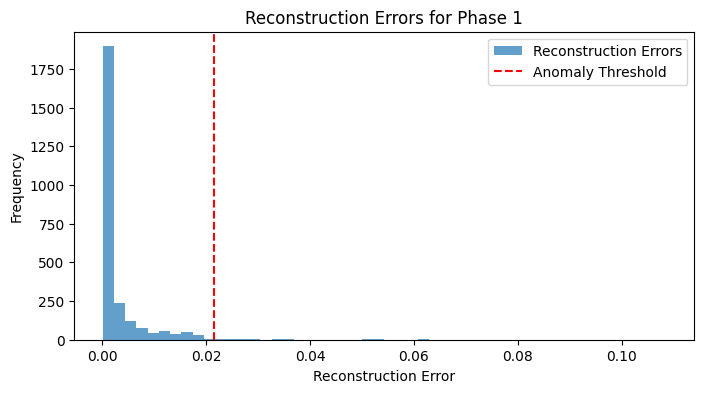

Phase 2 Reconstruction Errors


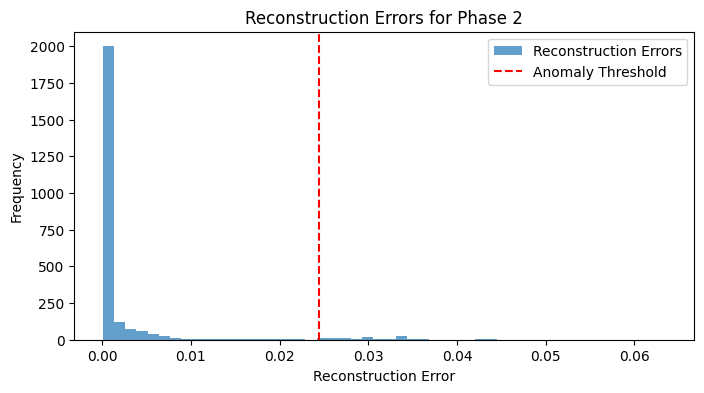

Phase 3 Reconstruction Errors


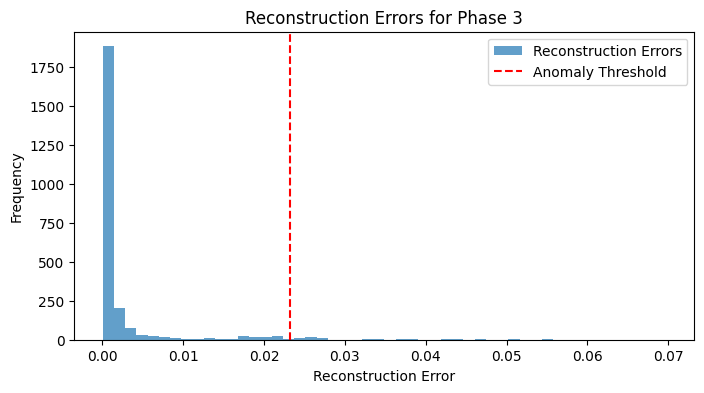

In [22]:
# Function to plot reconstruction errors and threshold
def plot_reconstruction_errors(errors, threshold, phase_num):
    plt.figure(figsize=(8, 4))
    plt.hist(errors, bins=50, alpha=0.7, label='Reconstruction Errors')
    plt.axvline(threshold, color='r', linestyle='--', label='Anomaly Threshold')
    plt.title(f'Reconstruction Errors for Phase {phase_num}')
    plt.xlabel('Reconstruction Error')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Plot reconstruction errors for each phase
print("Phase 1 Reconstruction Errors")
plot_reconstruction_errors(reconstruction_errors_1, threshold_1, 1)

print("Phase 2 Reconstruction Errors")
plot_reconstruction_errors(reconstruction_errors_2, threshold_2, 2)

print("Phase 3 Reconstruction Errors")
plot_reconstruction_errors(reconstruction_errors_3, threshold_3, 3)
